Stock Market Prediction And Forecasting Using Stacked LSTM

using keras and tensorflow >2.0

In [1]:
import pandas_datareader as pdr
key=""

In [7]:


# Set your Alpha Vantage API key
api_key = 'PQG3RXXX5IEZ3FBF'

# Retrieve Bharti Airtel stock data from Alpha Vantage
df = pdr.DataReader('BHARTIARTL.BO', data_source='av-daily', start='2010-01-01', end='2023-12-31', api_key='PQG3RXXX5IEZ3FBF')

# Display the retrieved data
print(df)


                 open       high        low      close   volume
2010-01-04   329.9998   332.3998   323.4998   324.9999   716694
2010-01-05   329.3999   331.9999   325.4499   330.0999  1130116
2010-01-06   334.2998   335.3499   326.4999   327.0499   805901
2010-01-07   329.0498   334.1499   327.0499   329.1499   737678
2010-01-08   329.0498   331.9999   324.4999   325.1499   471303
...               ...        ...        ...        ...      ...
2023-12-22   981.1500   998.6500   976.0000   989.2500   139504
2023-12-26   996.2500  1002.5500   989.7500   999.4500    28166
2023-12-27  1000.0000  1024.0000   998.4500  1020.9500    52677
2023-12-28  1024.7500  1042.0000  1022.2500  1037.4000    52687
2023-12-29  1034.0500  1043.0500  1024.3000  1032.8500   616032

[3449 rows x 5 columns]


In [8]:
df.to_csv('BHARTIARTL.BO.csv')

In [9]:
import pandas as pd

In [10]:
df=pd.read_csv('BHARTIARTL.BO.csv')

In [11]:
df.head()

,Unnamed: 0,open,high,low,close,volume
0,2010-01-04,329.9998,332.3998,323.4998,324.9999,716694
1,2010-01-05,329.3999,331.9999,325.4499,330.0999,1130116
2,2010-01-06,334.2998,335.3499,326.4999,327.0499,805901
3,2010-01-07,329.0498,334.1499,327.0499,329.1499,737678
4,2010-01-08,329.0498,331.9999,324.4999,325.1499,471303


Taking close price

In [12]:
df1=df.reset_index()['close']

In [13]:
df1

0        324.9999
1        330.0999
2        327.0499
3        329.1499
4        325.1499
          ...    
3444     989.2500
3445     999.4500
3446    1020.9500
3447    1037.4000
3448    1032.8500
Name: close, Length: 3449, dtype: float64

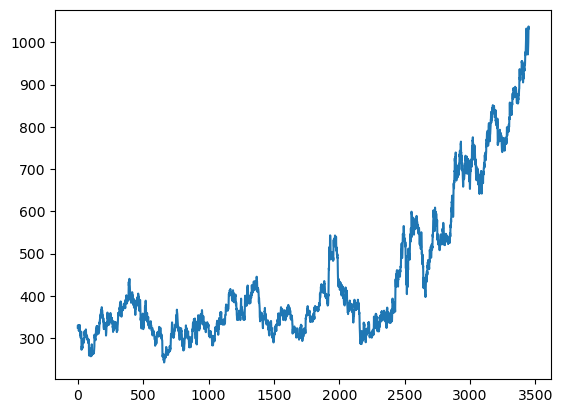

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [16]:
import numpy as np

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[0.10401206]
 [0.11042635]
 [0.10659035]
 ...
 [0.97931078]
 [1.        ]
 [0.99427745]]


splitting dataset into train and test split


In [20]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(2241, 1208)

In [22]:
train_data

array([[0.10401206],
       [0.11042635],
       [0.10659035],
       ...,
       [0.08156206],
       [0.08678153],
       [0.08087032]])

In [24]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99 and then in Y_train=   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [25]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(2140, 100)
(2140,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(1107, 100)
(1107,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

Stacked LTSM Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
34/34 [==============================] - 11s 175ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 2/100
34/34 [==============================] - 5s 135ms/step - loss: 5.9195e-04 - val_loss: 0.0020
Epoch 3/100
34/34 [==============================] - 4s 132ms/step - loss: 4.9538e-04 - val_loss: 0.0011
Epoch 4/100
34/34 [==============================] - 4s 132ms/step - loss: 4.4803e-04 - val_loss: 9.9620e-04
Epoch 5/100
34/34 [==============================] - 4s 133ms/step - loss: 4.0425e-04 - val_loss: 7.3227e-04
Epoch 6/100
34/34 [==============================] - 5s 134ms/step - loss: 3.7712e-04 - val_loss: 0.0015
Epoch 7/100
34/34 [==============================] - 5s 134ms/step - loss: 3.2147e-04 - val_loss: 0.0014
Epoch 8/100
34/34 [==============================] - 4s 132ms/step - loss: 3.0981e-04 - val_loss: 8.8247e-04
Epoch 9/100
34/34 [==============================] - 5s 133ms/step - loss: 2.8861e-04 - val_loss: 0.0014
Epoch 10/100
34/34 [==========================

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.12.0'

prediction and check performance metrics

In [44]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

35/35 [==============================] - 1s 26ms/step


In [45]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
# RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

353.9043113554041

In [49]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

665.5233967656071

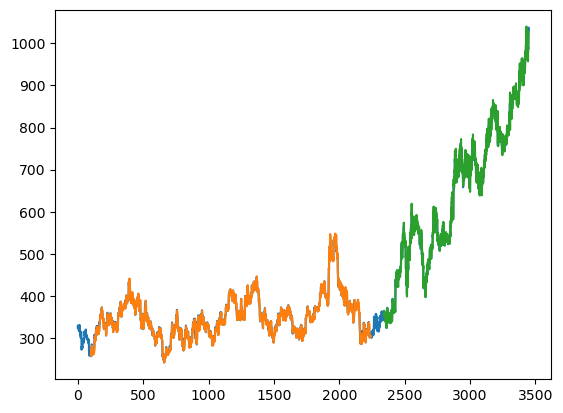

In [50]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [51]:
len(test_data)

1208

In [56]:
x_input=test_data[1108:].reshape(1,-1)
x_input.shape

(1, 100)

In [57]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [58]:
temp_input

[0.791912993093574,
 0.8149918481962208,
 0.8159351256527323,
 0.808137365345571,
 0.8067538917426875,
 0.7950572512819456,
 0.7900264381805511,
 0.7854358212255286,
 0.7731103291271124,
 0.772607247816973,
 0.7718526258517637,
 0.7917872227660392,
 0.7988303611079914,
 0.7869450651559471,
 0.7887687349052026,
 0.7937366628428295,
 0.7897748975254815,
 0.7706578077401827,
 0.7736762956010195,
 0.7728587884720426,
 0.7843038882777149,
 0.7832348404936686,
 0.7844296586052499,
 0.8009055715123166,
 0.795874758410922,
 0.8092692982933847,
 0.8141743410672442,
 0.8154320443425929,
 0.8459313487697964,
 0.8457426932784942,
 0.8730348543535589,
 0.8528487167842136,
 0.8410263059959369,
 0.849955999250912,
 0.8412778466510067,
 0.8397686027205882,
 0.8424726647625878,
 0.851842554163935,
 0.8586970370145846,
 0.8603949364363053,
 0.85857126668705,
 0.8582568408682127,
 0.863287653969607,
 0.8599547402899332,
 0.858445496359515,
 0.8884417194765792,
 0.8969312165851822,
 0.8911457815185786,
 0

In [59]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9742102]
101
1 day input [0.81499185 0.81593513 0.80813737 0.80675389 0.79505725 0.79002644
 0.78543582 0.77311033 0.77260725 0.77185263 0.79178722 0.79883036
 0.78694507 0.78876873 0.79373666 0.7897749  0.77065781 0.7736763
 0.77285879 0.78430389 0.78323484 0.78442966 0.80090557 0.79587476
 0.8092693  0.81417434 0.81543204 0.84593135 0.84574269 0.87303485
 0.85284872 0.84102631 0.849956   0.84127785 0.8397686  0.84247266
 0.85184255 0.85869704 0.86039494 0.85857127 0.85825684 0.86328765
 0.85995474 0.8584455  0.88844172 0.89693122 0.89114578 0.89542197
 0.88447995 0.89523332 0.8935983  0.8808955  0.88391399 0.87718528
 0.85555278 0.83348009 0.84549115 0.85976608 0.84505096 0.84429633
 0.8575651  0.86580306 0.87636777 0.87372659 0.87360082 0.86781539
 0.87177715 0.87139984 0.88982519 0.88837883 0.88705825 0.90466609
 0.91699158 0.91435041 0.92441203 0.91868948 0.93478809 0.94730223
 0.97126148 0.97182745 0.99371148 0.9915105  0.98308389 0.95138977
 0.95233305 0.9537794  0.94755377 0

In [61]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [62]:
import matplotlib.pyplot as plt

In [63]:
len(df1)

3449

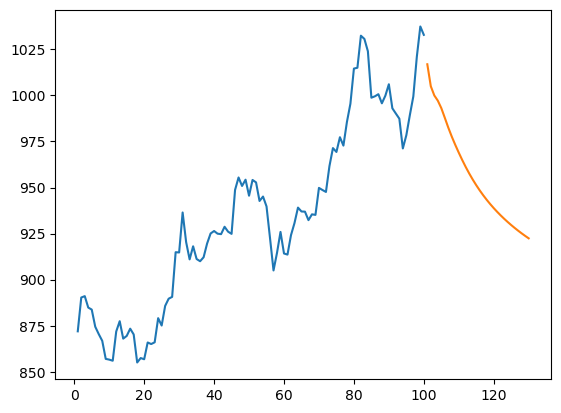

In [64]:
plt.plot(day_new,scaler.inverse_transform(df1[3349:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

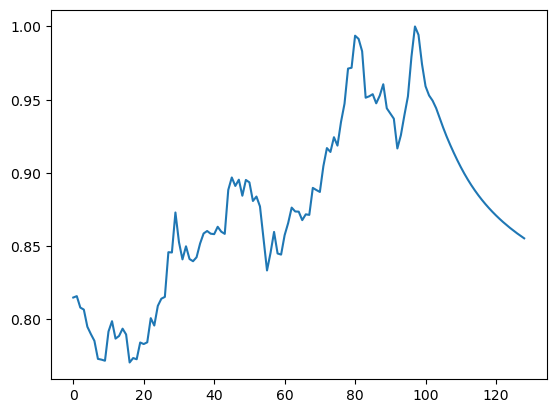

In [71]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3350:])

In [72]:
df3=scaler.inverse_transform(df3).tolist()


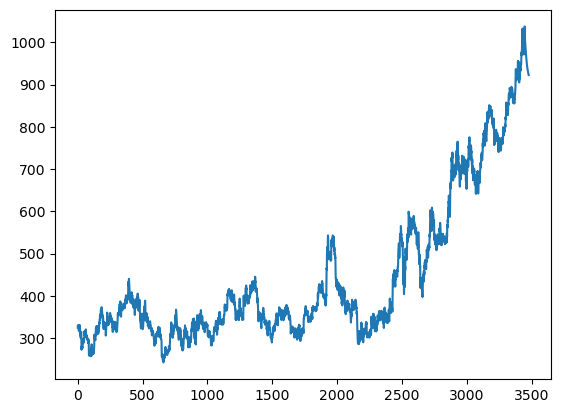

In [73]:
plt.plot(df3)

In [74]:
from powerbiclient import QuickVisualize,get_dataset_config,Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication
from powerbiclient.authentication import InteractiveLoginAuthentication
import pandas as pd

In [75]:
device_auth=InteractiveLoginAuthentication()

A local browser window will open for interactive sign in.

Interactive authentication successfully completed.
You are now logged in.

The result should be passed only to trusted code in your notebook.


In [91]:
df_visualize = pd.DataFrame(df3)

In [92]:
PBI_visualize= QuickVisualize(get_dataset_config(df_visualize),auth=device_auth)

In [93]:
PBI_visualize

QuickVisualize()